In [102]:
import numpy as np
from numpy.polynomial import Polynomial
from numpy.polynomial import Chebyshev
import matplotlib.pyplot as plt

In [2]:
years = np.arange(1900, 1981)
population = np.array([76094000, 77584000, 79163000, 80632000, 82166000, 83822000, 85845000, 87008000, 88710000, 90490000,
                       92407000, 93863000, 95335000, 97112000, 98829000, 100546000, 101961000, 103268000, 103208000,
                       104514000, 106461000, 108538000, 110049000, 111947000, 114109000, 115829000, 117397000, 119035000,
                       120509000, 121767000, 123076741, 124039648, 124840471, 125578763, 126373773, 127250232, 128053180,
                       128824829, 129824939, 130879718, 132122446, 133402471, 134859553, 136739353, 138397345, 139928165,
                       141388566, 144126071, 146631302, 149188130, 152271417, 154877889, 157552740, 160184192, 163025854,
                       165931202, 168903031, 171984130, 174881904, 177829628, 180671158, 183691481, 186537737, 189241798,
                       191888791, 194302963, 196560338, 198712056, 200706052, 202676946, 205052174, 207660677, 209896021,
                       211908788, 213853928, 215973199, 218035164, 220239425, 222584545, 225055487, 227224681])

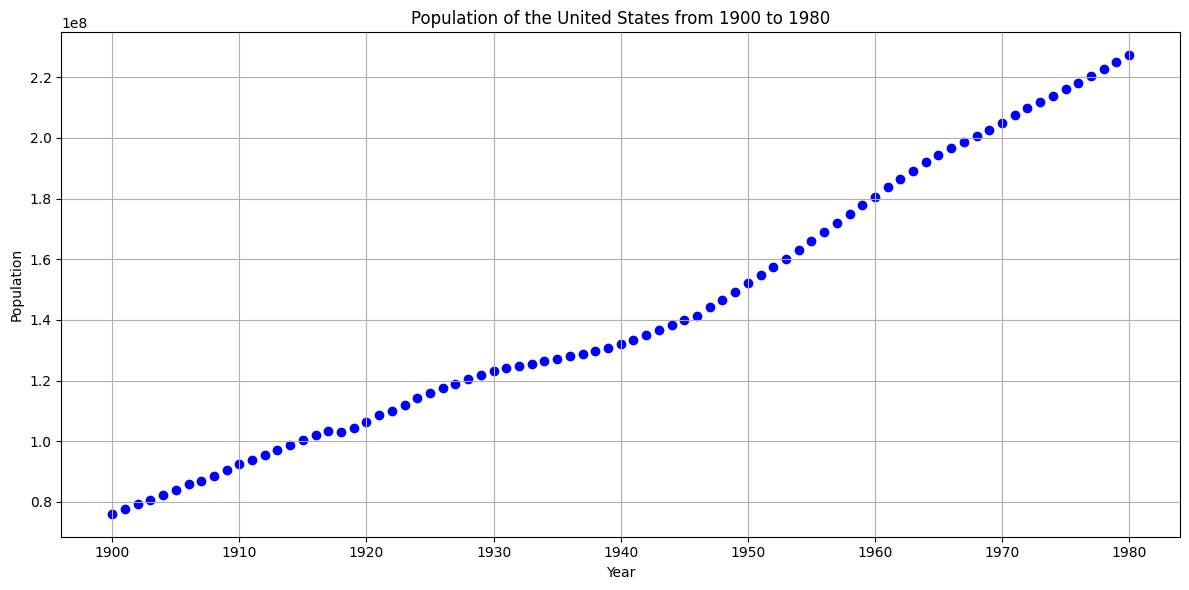

In [109]:
plt.figure(figsize=(12, 6))
plt.scatter(years, population, color='blue', marker='o')
plt.title('Population of the United States from 1900 to 1980')
plt.xlabel('Year')
plt.ylabel('Population')
plt.grid(True)
plt.tight_layout()
plt.show()

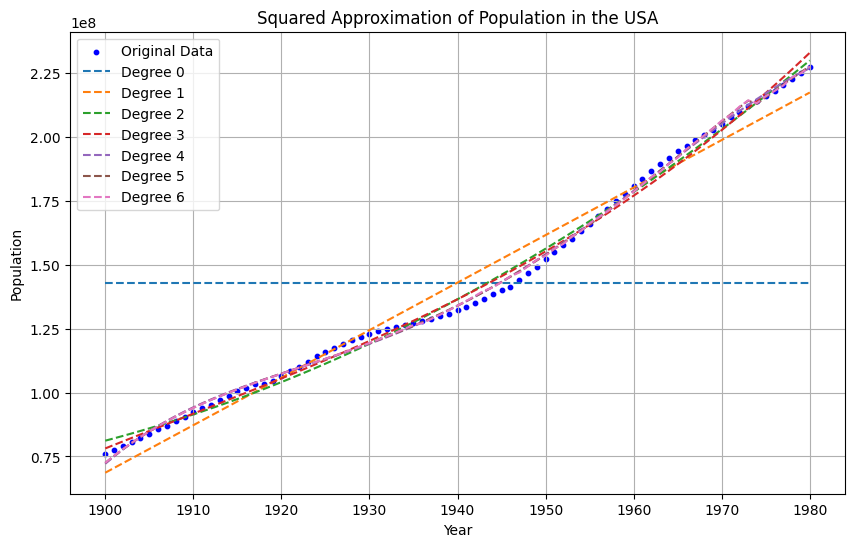

In [105]:
degrees = range(7)
years_adjusted = years - 1900

plt.figure(figsize=(10, 6))
plt.scatter(years, population, label='Original Data', color='blue', s=10)

all_coeffs = [[] for _ in degrees]
all_predictions = [[] for _ in degrees]
for m in degrees:
    X = np.column_stack([years_adjusted**i for i in range(m + 1)])
    coeffs, _, _, _ = np.linalg.lstsq(X, population, rcond=None)
    predicted_population = X @ coeffs
    plt.plot(years, predicted_population, label=f'Degree {m}', linestyle='--')
    all_coeffs[m] = coeffs
    all_predictions[m] = predicted_population

plt.title('Squared Approximation of Population in the USA')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()

a)

In [87]:
true_value_1990 = 248709873

min_relative_error = float('inf')
best_degree = -1
print("True value of population in 1990: ", end = "")
print(true_value_1990)

for m in degrees:
    coeffs = all_coeffs[m]
    predicted_population_1990 = 0
    it = 0
    for coeff in coeffs:
        predicted_population_1990 += (1990 - 1900) ** it * coeff
        it += 1
        
    relative_error = abs(predicted_population_1990 - true_value_1990) / true_value_1990
    
    print(f"For m = {m}, predicted population is: {predicted_population_1990}")
    print(f"Relative error: {relative_error}\n")
    
    if relative_error < min_relative_error:
        min_relative_error = relative_error
        best_degree = m

print("Minimum relative error:", min_relative_error)
print("Degree with the smallest relative error:", best_degree)

True value of population in 1990: 248709873
For m = 0, predicted population is: 143007890.02469137
Relative error: 0.4250011537551974

For m = 1, predicted population is: 235951457.81940687
Relative error: 0.05129838645606615

For m = 2, predicted population is: 259186926.75758666
Relative error: 0.04212560454962983

For m = 3, predicted population is: 268498813.8219031
Relative error: 0.07956636615669499

For m = 4, predicted population is: 235575481.29115748
Relative error: 0.0528100937466303

For m = 5, predicted population is: 248019316.6005056
Relative error: 0.002776554027247682

For m = 6, predicted population is: 358063156.4106788
Relative error: 0.4396821167235239

Minimum relative error: 0.002776554027247682
Degree with the smallest relative error: 5


b)

In [99]:
best_degree = -1
min_AICc = float('inf')

for m in degrees:
    coeffs = all_coeffs[m]
    predicted_population = all_predictions[m]
    
    # Calculate the AICc
    k = m + 1
    n = len(population)
    AIC = 2*k + n*np.log(np.sum((population - predicted_population) ** 2) / n)
    AICc = AIC + (2*k*(k + 1)) / (n - k - 1)

    if AICc < min_AICc:
        min_AICc = AICc
        best_degree = m

print("Best degree:", best_degree)
print("Minimum AICc:", min_AICc)

Best degree: 5
Minimum AICc: 2359.1314808551087


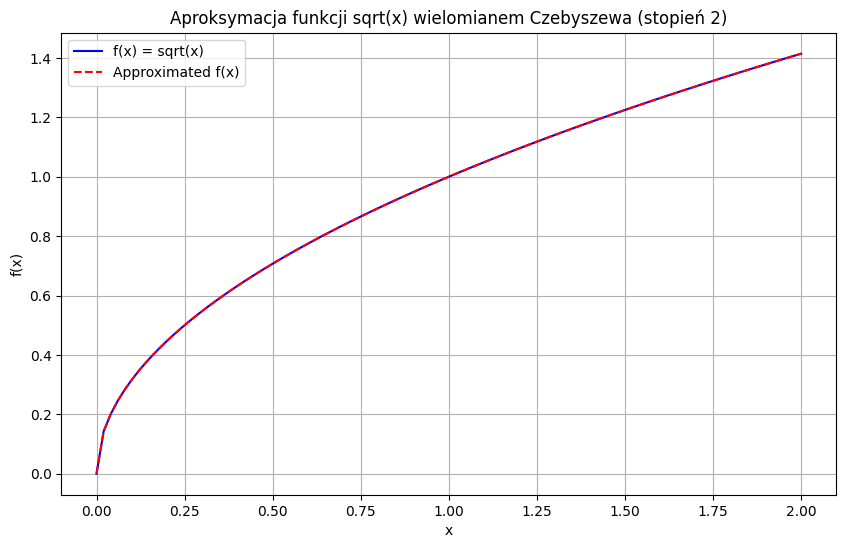

In [103]:
x_cheb = np.linspace(-1, 1, 100)

# 2. Skonstruujmy wielomiany Czebyszewa stopnia 2
cheb_poly_0 = Chebyshev.basis(0)
cheb_poly_1 = Chebyshev.basis(1)
cheb_poly_2 = Chebyshev.basis(2)

# 3. Przekształćmy argumenty z przedziału [0,2] na przedział [-1, 1]
x = np.linspace(0, 2, 100)
x_normalized = 2 * (x - 0) / (2 - 0) - 1  # Normalizacja argumentów do przedziału [-1, 1]

# 4. Obliczmy wartości funkcji f(x) = sqrt(x) w tych punktach
f_x = np.sqrt(x)

# 5. Dokonajmy aproksymacji średniokwadratowej, używając wielomianów Czebyszewa
coeffs = np.polynomial.chebyshev.chebfit(x_normalized, f_x, 2)

# Obliczmy wartości aproksymowanej funkcji
fitted_f_x = np.polynomial.chebyshev.chebval(x_cheb, coeffs)

# Wykres
plt.figure(figsize=(10, 6))
plt.plot(x, f_x, label='f(x) = sqrt(x)', color='blue')
plt.plot(x, np.sqrt(x), label='Approximated f(x)', linestyle='--', color='red')
plt.title('Aproksymacja funkcji sqrt(x) wielomianem Czebyszewa (stopień 2)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()